# Assignment 2: Linear regression {-}

This assignment aims at familiarizing you with the use of Linear Regression model supported by scikit-learn. You will have to do:

1.  **(5 points) Coding Tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Analyze the dataset using libraries like Pandas and Matplotlib.  
    1.2 *(1 point)* Preprocess the data for modeling.  
    1.3 *(1 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    1.4 *(1 point)* Train a Linear Regression model on the training set.    
    1.5 *(1 point)* Evaluate the model performance on the test set.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount.  
    2.2 *(1 point)* Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations.  
    2.3 *(1 point)* Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants.  
    2.4 *(1 point)* Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?  
    2.5 *(1 point)* Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.  


The dataset you will be working on is 'house-loan.csv'. It is composed of attributes such as gender, age, income, etc. This dataset is to predict the loan amount for which a customer can request a bank with his/her collateral house.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-\<StudentID>-Assignment2 (e.g., DataViz-2012345-Assigment2) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you analyze, pre-process, split the data for training/testing purpose, then build a regression model, evaluate the model performance and reasonably answer the open discussion questions.

Note that the evaluation will not consider the model accuracy as the most important criterion, but how properly you handle the data and build the model to learn the data pattern.

### Deadline {-}
Please visit Canvas for details.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This is a dataset about loan amount for which a customer can request a bank with his/her collateral house.

* Gender: Gender of customer requesting for a loan ('F' or 'M').
* Age: Age of customer requesting for a loan (non-negative values).
* Income (USD): Income of customer requesting for a loan (non-negative values).
* Income Stability: Income stability of customer requesting for a loan ("Low" or "High").
* Property Age: Age of the property (non-negative number of days).
* Property Location: Location of the property ("Rural", "Urban", and "Semi-Urban").
* Property Price: Price of the property (USD).
* Loan Sanction Amount (USD): Amount of loan the customer can request for (USD, target value).

In [ ]:
# Load and display data
data = pd.read_csv("house_loan.csv")
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


## 1. Coding tasks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


None

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


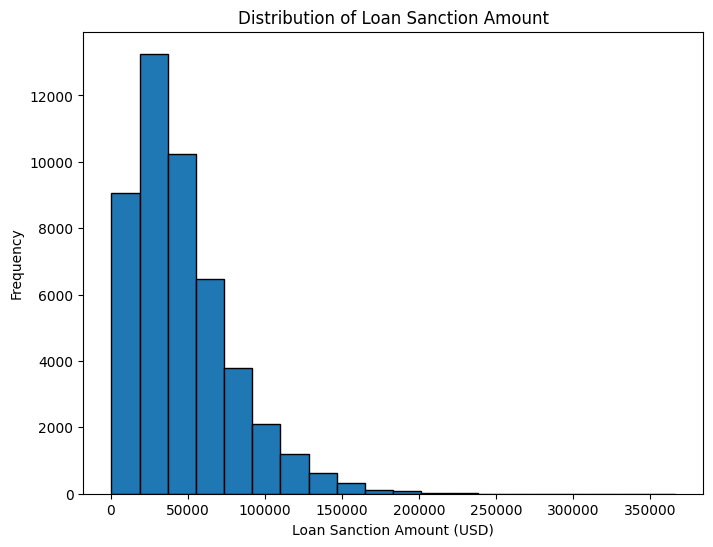

<Figure size 800x600 with 0 Axes>

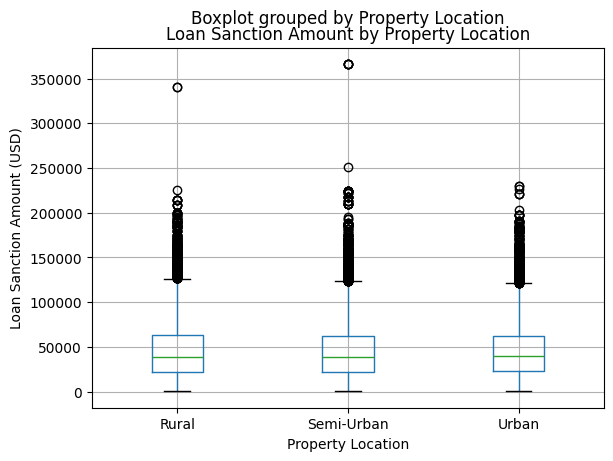

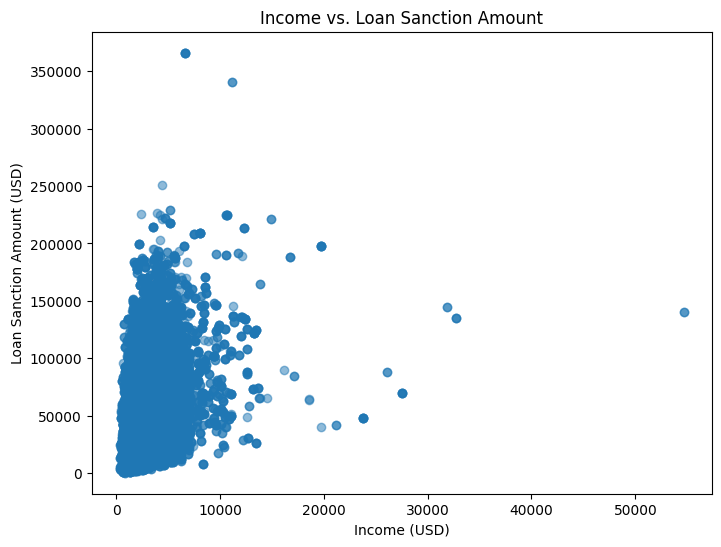

In [ ]:
# 1.1 Analyze the dataset using libraries like Pandas and Matplotlib
display(data.info())
display(data.describe())
# Histogram of Loan Sanction Amount (USD)
plt.figure(figsize=(8, 6))
plt.hist(data['Loan Sanction Amount (USD)'], bins=20, edgecolor='black')
plt.title('Distribution of Loan Sanction Amount')
plt.xlabel('Loan Sanction Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# Box plot of Loan Sanction Amount (USD) by Property Location
plt.figure(figsize=(8, 6))
data.boxplot(column='Loan Sanction Amount (USD)', by='Property Location')
plt.title('Loan Sanction Amount by Property Location')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

# Scatter plot of Income (USD) vs. Loan Sanction Amount (USD)
plt.figure(figsize=(8, 6))
plt.scatter(data['Income (USD)'], data['Loan Sanction Amount (USD)'], alpha=0.5)
plt.title('Income vs. Loan Sanction Amount')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

In [1]:
# 1.2 Preprocess the data for modeling
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print(data.isnull().sum())

# Handle missing values (I chose to drop NA values because they are very few)
data.dropna(inplace=True)

# Remove duplicate rows
data = data.drop_duplicates()

# Verify changes
display(data.info())
display(data.describe())

# Check if all missing values are handled
print(data.isnull().sum())

NameError: name 'data' is not defined

In [ ]:
# 1.3
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Property Age', 'Property Location', 'Property Price']]
y = data['Loan Sanction Amount (USD)']

# Split data into training and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (37800, 7)
Test set size: (9451, 7)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical and numerical features
categorical_cols = ["Gender", "Income Stability", "Property Location"]
numerical_cols = ['Age', 'Income (USD)', 'Property Age', 'Property Price']

# Drop the first category for all categorical variables
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# ColumnTransformer setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

# Preprocess the data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Feature names after encoding
num_features = numerical_cols
cat_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_names = num_features + cat_features

# Build regression function as string
function_str = "y = " + str(round(model.intercept_, 2))
for feature, coef in zip(feature_names, model.coef_):
    function_str += f" + {round(coef, 2)}*{feature}"

print("Regression Function:")
print(function_str)

Regression Function:
y = 11988.04 + -79.39*Age + 0.54*Income (USD) + 0.49*Property Age + 0.34*Property Price + -241.21*Gender_M + -11156.53*Income Stability_Low + -276.8*Property Location_Semi-Urban + -122.87*Property Location_Urban


In [ ]:
# 1.5
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)

Mean Absolute Error (MAE): 127.84294719438995
Mean Squared Error (MSE): 2290198.043697669
R-squared Score (R²): 0.997777009869652


**Insights**
The Model is Highly Accurate (R² = 0.9978)
- The model explains 99.78% of the variance in loan sanction amounts based on the given features.
- This indicates that income, age, property location, and stability metrics are strongly predictive of loan approvals.
- However, a near-perfect fit might suggest overfitting, meaning the model performs very well on the given data but could struggle with unseen data.

Prediction Errors Are Low (MAE = 127.84 USD)
- On average, the model's predictions are off by only $127.84, which is small relative to typical loan amounts.
- This suggests the model is making very precise predictions with minimal deviations.
- The MSE is large but it is due to some extreme data that yet cleared from the dataset. However, the R² is still high so it is not a big problem.

Potential Overfitting Risk
- Since the R² score is extremely high, there's a chance the model is too optimized for this dataset.

## 2. Open discussion questions

> Regression function: Loan Sanction Amount (USD) = 11988.04 + -79.39xAge + 0.54xIncome (USD) + 0.49xProperty Age + 0.34xProperty Price + -241.21xGender_M + -11156.53xIncome Stability_Low + -276.8xProperty Location_Semi-Urban + -122.87xProperty Location_Urban

###2.1
**Coefficient values:**
- Income: +0.54
- Income Stability_Low: -11156.53

**Interpretation:**
- A 1 dollar increase in income increases the sanctioned loan by 0.54.
- Having low income stability decreases the sanctioned loan by 11,156.53, compared to a highly stable income (value = 0).

Therefore, Income stability has a significantly stronger influence than income amount. While the change in income making only 0.54 change per dollar, the change in stability status creates a much larger impact. Borrowers with high income but low stability still receive much lower loans than those with moderate income and high stability.

This conclusion is also shown below when the scatterplot predicts poorly the expected loans while the box plot of High stability (0) is higher than the Low stability (1).

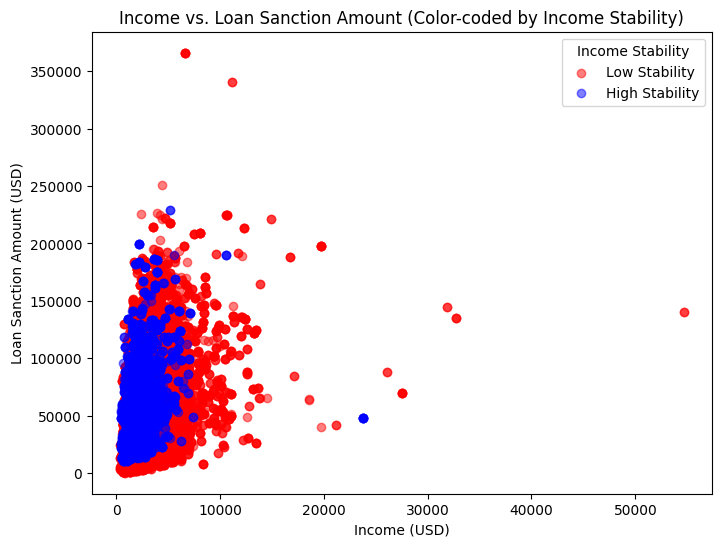

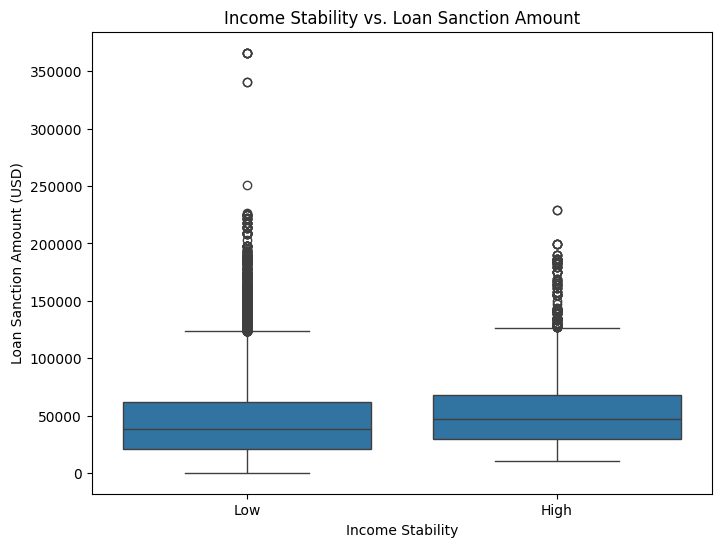

In [ ]:
# Scatter plot of Income (USD) vs. Loan Sanction Amount (USD)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Separate data points based on Income Stability for creating legend entries
low_stability = data[data['Income Stability'] == 'Low']
high_stability = data[data['Income Stability'] == 'High']

# Create scatter plots for each group with specific labels and colors
plt.scatter(low_stability['Income (USD)'], low_stability['Loan Sanction Amount (USD)'],
            c='red', alpha=0.5, label='Low Stability')
plt.scatter(high_stability['Income (USD)'], high_stability['Loan Sanction Amount (USD)'],
            c='blue', alpha=0.5, label='High Stability')

plt.title('Income vs. Loan Sanction Amount (Color-coded by Income Stability)')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Sanction Amount (USD)')

# Add a legend
plt.legend(title="Income Stability")

# Box plot for Income Stability vs. Loan Amount
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Income Stability', y='Loan Sanction Amount (USD)', data=data)
plt.title('Income Stability vs. Loan Sanction Amount')
plt.xlabel('Income Stability')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

###2.2
Loan Sanction Amount (USD) = ...-276.8xProperty Location_Semi-Urban + -122.87xProperty Location_Urban

**Data Interpretation:**
- Rural is the reference category (not included in the equation).
- Semi-Urban: The coefficient for semi-urban properties is -276.80, meaning that properties in semi-urban areas receive, on average, 276.80 USD less in loan amounts compared to rural properties.
- Urban: The coefficient for urban properties is -122.87, meaning that properties in urban areas receive, on average, 122.87 USD less in loan amounts compared to rural properties.

**Conclusion:**
Yes, there is a difference in loan amounts based on property location. The Rural properties are the baseline and receive the highest loan amounts on average, while Semi-Urban properties receive the lowest loan amounts. Urban properties also have smaller loan, but the reduction is smaller. This finding suggests that property location is a factor influencing loan amounts, with rural properties being more favorable for loan sanctioning compared to urban and semi-urban properties (but interestingly semi-urban has the lowest). Though in illustration, this difference is quite unclear.

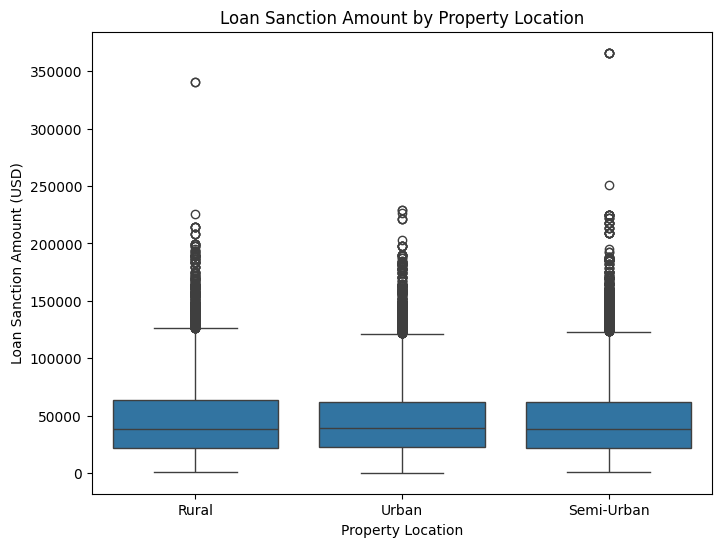

In [ ]:
# Box plot of Loan Sanction Amount (USD) by Property Location
plt.figure(figsize=(8, 6))
sns.boxplot(x='Property Location', y='Loan Sanction Amount (USD)', data=data)
plt.title('Loan Sanction Amount by Property Location')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()


###2.3
Loan Sanction Amount (USD) = ... + -241.21xGender_M + ...

**Interpretation**
Gender_M (Male) has a coefficient of -241.21, meaning that being male (compared to female, who is the reference category) is associated with a $241.21 reduction in the loan amount.

**Conclusion:** Yes,here appears to be a gender bias in loan approvals, with male applicants receiving, on average, $241.21 less in loan amounts than female applicants.

This suggests that the model indicates a gender-related disparity in the loan approval process. The model’s coefficient for gender shows a disadvantage for male applicants, which could potentially reflect implicit bias in the approval process, lender policies, or external factors that affect male applicants' eligibility for larger loan amounts. This is quite interesting because comparing between male and female's incomes, male usually gain more money on average and therefore should be expected as having higher loan ([Our World in Data](https://ourworldindata.org/economic-inequality-by-gender)).

However, these still needs to be checked in terms of its statistical significance and covariance. Particularly when the  difference is hard to see in the box plot.

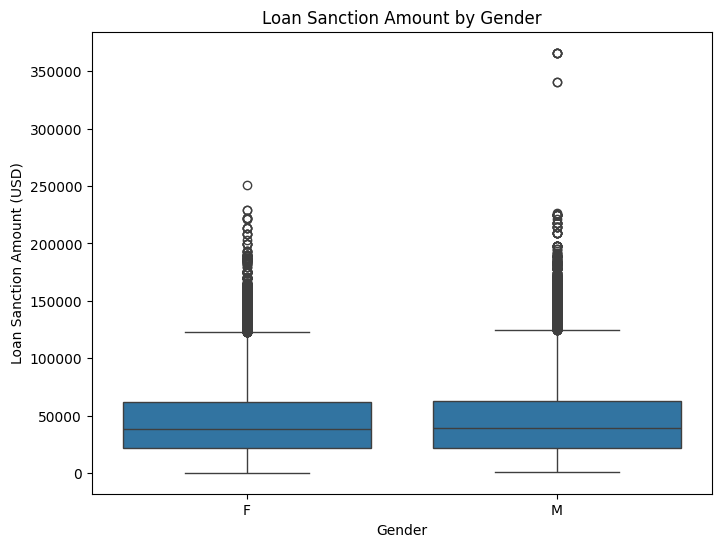

In [ ]:
# Box plot for men & women
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Loan Sanction Amount (USD)', data=data)
plt.title('Loan Sanction Amount by Gender')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()


###2.4
**New feature suggestions from existing data frame to help uncover more insights and improve model performance**
- *Income-to-Age Ratio:* The core idea is the difference in average income and paying habit of different age periods. The initial assumptions would be younger borrowers may not have had as much time to build up their income, while older borrowers might have more financial stability but could also be more cautious in terms of taking on large loans. This feature could act as a proxy for financial maturity or earning potential, providing further context for the model to understand a borrower's financial situation.
  + Young High-Income Borrowers: More likely to qualify for a larger loan by a successful career or strong financial backing.
  + Older Low-Income Borrowers: Less able to repay a loan, thus higher risk.
  + Loan Behavior by Age Group: The ratio could show trends like whether younger borrowers with high income are more likely to receive larger loans or if older borrowers with moderate income have different loan approval patterns.
- Due to the large influence of stability category to income, I suggest using *Income Stability Adjustment*, which multiply the income by a stability factor, here is Low = 1 and High = 2, i.e., dublicating values for who can prove to have their income status less varied. With this scale, a borrower with high income stability adjustment might be considered lower risk and, therefore, could receive higher loan amounts.
- *Location x Value or Location x Income*: The Location factor can affect a lot to the living standards, thus having the difference between the sanction amount for Urban and Rural area. To make this data more nuanced, we can check whether the combination of location with either property price (value) or income also correlates with loans.

In [ ]:
# Demo
# Feature 1: Income-to-Age Ratio
data['Income_Age_Ratio'] = data['Income (USD)'] / data['Age']

# Feature 2: Income Stability Adjustment
stability_factor = { 'Low': 1, 'High': 2}  # Scale factor
data['Income_Stability_Adjusted'] = data['Income (USD)'] * data['Income Stability'].map(stability_factor)

# Display sample output
print("Feature Engineering: New Features Added")
print(data[['Age', 'Income (USD)', 'Income_Age_Ratio', 'Income Stability', 'Income_Stability_Adjusted']].head())

Feature Engineering: New Features Added
   Age  Income (USD)  Income_Age_Ratio Income Stability  \
0   19       1641.25         86.381579              Low   
1   29       1989.71         68.610690              Low   
2   37       1849.91         49.997568              Low   
3   65       2735.18         42.079692             High   
4   62       4741.78         76.480323             High   

   Income_Stability_Adjusted  
0                    1641.25  
1                    1989.71  
2                    1849.91  
3                    5470.36  
4                    9483.56  


###2.5
1. Borrower Behavior Analysis Using Income/Age Ratio

The income/age ratio provides insights into a borrower's earning potential relative to their life stage, helping lenders optimize loan offerings:
- High-income, young borrowers → Likely to request higher loan amounts but may have a higher default risk due to career instability.
- Low-income, older borrowers → More financially conservative but may struggle with large repayments.
- **Insight:** This ratio can help adjust loan term lengths—younger, high-ratio borrowers might be offered longer loan tenures with lower monthly payments to reduce default risk.

2. Identifying Underserved Borrowers Through Loan Approvals and Stability Metrics

By analyzing loan approvals vs. income stability, lenders can identify demographics that might be underserved and adjust policies accordingly:

- If high-income but low-stability applicants receive lower loan amounts, it may indicate a need for customized lending solutions for self-employed individuals or alternative risk assessment models.
- If semi-urban borrowers receive significantly lower loan amounts, this could suggest a bias in lending policies that discourages financial inclusion in these regions.
- **Insight:** Using an *Income Stability Adjustment* scale above (e.g., factoring in alternative stability indicators) could help reduce disparities in loan approvals and create customized loan products for underrepresented groups.

3. Identifying Market Trends Using Location and Financial Metrics

By analyzing *Location x Value* and *Location x Income*, lenders and policymakers can gain valuable market insights:

- Property value trends by location: Identifying whether urban, semi-urban, or rural areas show faster property appreciation can help adjust lending policies.
- Loan-to-Property Price ratio by location: If rural areas consistently have lower loan-to-property price ratios, lenders might consider relaxing lending criteria to encourage more rural investments.
- Income trends by location: If urban borrowers tend to have higher income but lower loan-to-income ratios, they may be eligible for higher loan amounts with lower interest rates.
- **Insight:** Banks and financial institutions can use these trends to optimize lending strategies and introduce location-based interest rate adjustments to match regional market conditions.

4. Refining Loan Marketing and Product Offerings

(This might go a bit further than the current data, but somewhat can draw from the previous three points.) Lenders can use borrower segmentation to create personalized financial products and optimize marketing efforts:
- Targeted loan offerings: If self-employed individuals frequently receive lower loan amounts, lenders can introduce "Flexible Income Loans" designed specifically for freelancers and entrepreneurs.
- Predicting high-value customers: If young, high-income borrowers tend to request larger loans, banks can proactively offer pre-approved credit lines.
- Regional marketing: If rural loan approval rates are low, marketing campaigns can focus on educating borrowers about loan eligibility and introducing subsidized rural financing programs.
- Insight: Using borrower data to design tailored loan products can increase loan uptake and improve customer satisfaction.


In [ ]:
# Demo
# Categorizing Borrowers Based on Income/Age Ratio
def categorize_borrower(row):
    if row['Income_Age_Ratio'] > 1800:  # Example threshold for high ratio
        return "Young High-Income"
    elif row['Income_Age_Ratio'] < 1200:
        return "Older Low-Income"
    else:
        return "Moderate"

data['Borrower_Category'] = data.apply(categorize_borrower, axis=1)

# Average Loan Amount per Borrower Category
avg_loan_by_category = data.groupby('Borrower_Category')['Loan Sanction Amount (USD)'].mean()

# Analyze lending fairness by stability adjustment
avg_loan_by_stability = data.groupby('Income Stability')['Loan Sanction Amount (USD)'].mean()

print("\nBorrower Category Analysis (Average Loan Amount per Category):")
print(avg_loan_by_category)

print("\nLoan Amount Analysis by Stability Level:")
print(avg_loan_by_stability)



Borrower Category Analysis (Average Loan Amount per Category):
Borrower_Category
Moderate              69862.113997
Older Low-Income      46468.040222
Young High-Income    139841.206154
Name: Loan Sanction Amount (USD), dtype: float64

Loan Amount Analysis by Stability Level:
Income Stability
High    53863.451766
Low     45752.477804
Name: Loan Sanction Amount (USD), dtype: float64
